In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
num_epochs = 5
batch_size = 4
learning_rate = 0.001

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [5]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

100%|██████████| 170498071/170498071 [00:04<00:00, 34254009.04it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [6]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [7]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [8]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

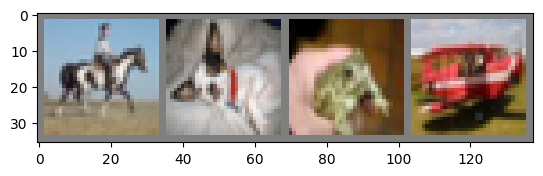

In [9]:
imshow(torchvision.utils.make_grid(images))

In [10]:
class CN(nn.Module):
    def __init__(self):
        super(CN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [11]:
model = CN().to(device)

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [13]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch: [{epoch+1}/{num_epochs}], Step: [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch: [1/5], Step: [2000/12500], Loss: 2.2860
Epoch: [1/5], Step: [4000/12500], Loss: 2.3147
Epoch: [1/5], Step: [6000/12500], Loss: 2.3022
Epoch: [1/5], Step: [8000/12500], Loss: 2.2913
Epoch: [1/5], Step: [10000/12500], Loss: 2.2793
Epoch: [1/5], Step: [12000/12500], Loss: 2.2631
Epoch: [2/5], Step: [2000/12500], Loss: 2.3320
Epoch: [2/5], Step: [4000/12500], Loss: 2.2435
Epoch: [2/5], Step: [6000/12500], Loss: 1.8161
Epoch: [2/5], Step: [8000/12500], Loss: 2.2003
Epoch: [2/5], Step: [10000/12500], Loss: 2.1724
Epoch: [2/5], Step: [12000/12500], Loss: 1.8885
Epoch: [3/5], Step: [2000/12500], Loss: 1.4699
Epoch: [3/5], Step: [4000/12500], Loss: 2.8171
Epoch: [3/5], Step: [6000/12500], Loss: 1.5281
Epoch: [3/5], Step: [8000/12500], Loss: 1.6468
Epoch: [3/5], Step: [10000/12500], Loss: 1.4612
Epoch: [3/5], Step: [12000/12500], Loss: 2.3239
Epoch: [4/5], Step: [2000/12500], Loss: 1.7990
Epoch: [4/5], Step: [4000/12500], Loss: 1.7538
Epoch: [4/5], Step: [6000/12500], Loss: 2.0081
Epoch: 

In [14]:
print('Eğitim Bitti')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

Finished Training


In [15]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

Accuracy of the network: 47.11 %


In [16]:
    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of plane: 57.1 %
Accuracy of car: 57.3 %
Accuracy of bird: 29.4 %
Accuracy of cat: 22.9 %
Accuracy of deer: 39.9 %
Accuracy of dog: 31.2 %
Accuracy of frog: 68.3 %
Accuracy of horse: 66.5 %
Accuracy of ship: 54.6 %
Accuracy of truck: 43.9 %
